In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("cleaned_insurance.csv")

sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

Distributions

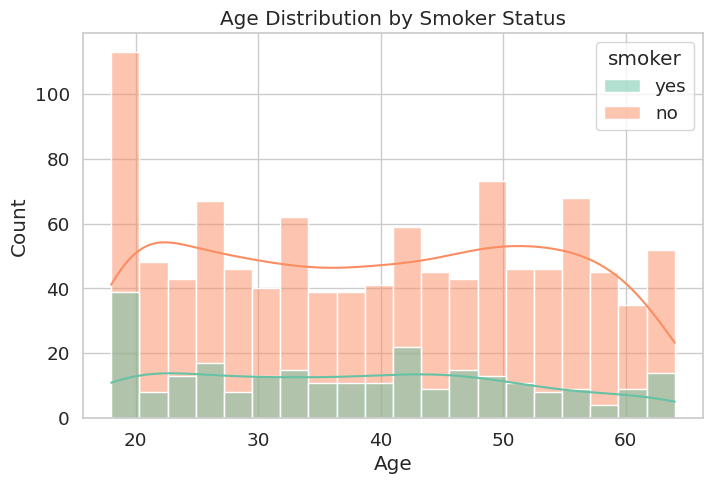

In [ ]:
# Age distribution by smoker status
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="age", hue="smoker", bins=20, kde=True, palette="Set2")
plt.title("Age Distribution by Smoker Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


BMI distribution colored by obesity category

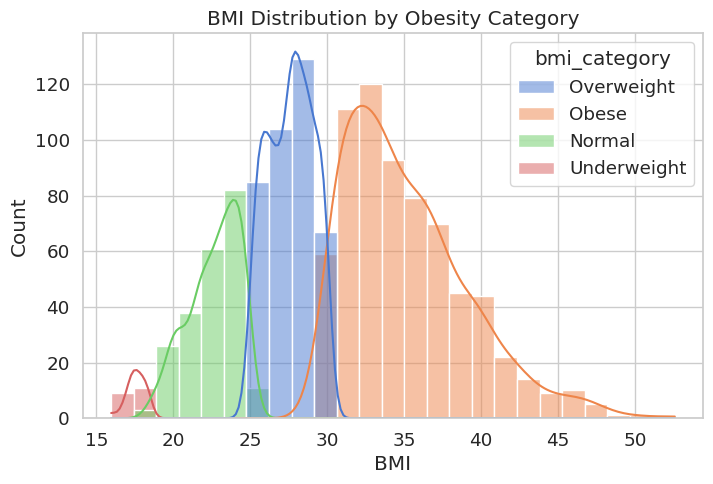

In [ ]:
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Normal"
    elif 25 <= bmi < 30:
        return "Overweight"
    else:
        return "Obese"

df["bmi_category"] = df["bmi"].apply(bmi_category)

plt.figure(figsize=(8,5))
sns.histplot(data=df, x="bmi", hue="bmi_category", kde=True, palette="muted")
plt.title("BMI Distribution by Obesity Category")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

Charges distribution (log-transform if skewed)

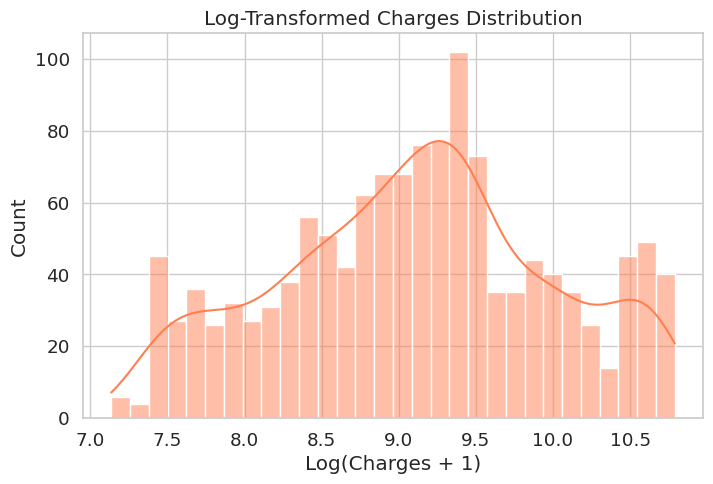

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(np.log1p(df["charges"]), bins=30, kde=True, color="coral")
plt.title("Log-Transformed Charges Distribution")
plt.xlabel("Log(Charges + 1)")
plt.ylabel("Count")
plt.show()


2. Comparisons

Average charges by sex

/tmp/ipython-input-1324646938.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x="sex", y="charges", estimator=np.mean, ci="sd", palette="Set2")
/tmp/ipython-input-1324646938.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="sex", y="charges", estimator=np.mean, ci="sd", palette="Set2")


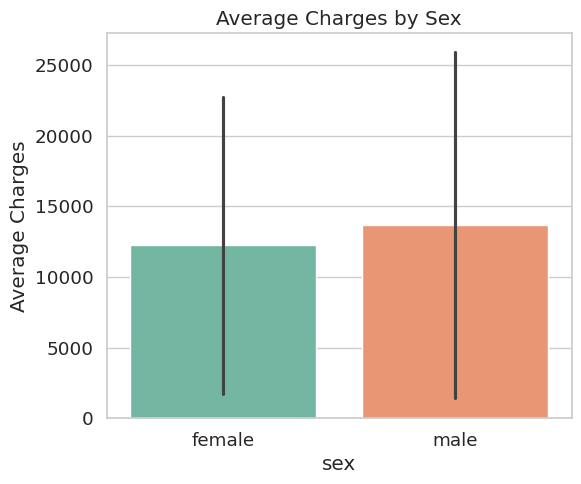

In [ ]:
plt.figure(figsize=(6,5))
sns.barplot(data=df, x="sex", y="charges", estimator=np.mean, ci="sd", palette="Set2")
plt.title("Average Charges by Sex")
plt.ylabel("Average Charges")
plt.show()

Charges by region

/tmp/ipython-input-1177867054.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x="region", y="charges", estimator=np.mean, ci="sd", palette="coolwarm")
/tmp/ipython-input-1177867054.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="region", y="charges", estimator=np.mean, ci="sd", palette="coolwarm")


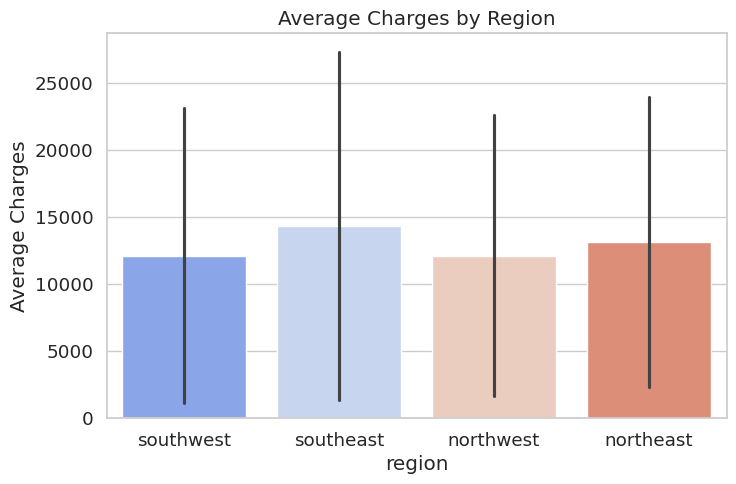

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="region", y="charges", estimator=np.mean, ci="sd", palette="coolwarm")
plt.title("Average Charges by Region")
plt.ylabel("Average Charges")
plt.show()

Smokers vs Non-Smokers charges

/tmp/ipython-input-963216770.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="smoker", y="charges", palette="Set1")


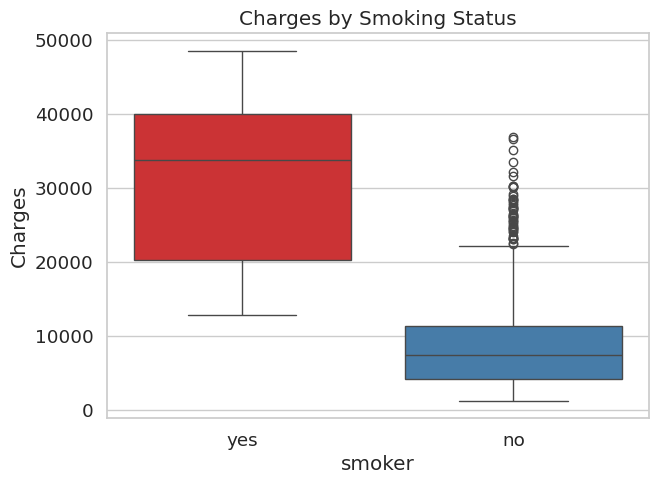

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="smoker", y="charges", palette="Set1")
plt.title("Charges by Smoking Status")
plt.ylabel("Charges")
plt.show()

3. Correlation & Heatmap

Select numeric columns

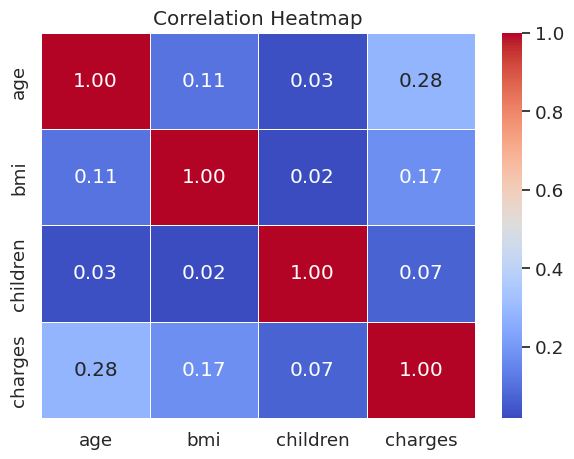

In [ ]:
num_cols = ["age", "bmi", "children", "charges"]
corr = df[num_cols].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()